In [1]:
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from xarray.backends.api import open_datatree

In [2]:
import os
import earthaccess
from getpass import getpass

# Prompt for credentials securely
os.environ["EARTHDATA_USERNAME"] = input("Enter your Earthdata username: ")
os.environ["EARTHDATA_PASSWORD"] = getpass("Enter your Earthdata password: ")

# Log in
auth = earthaccess.login(persist=False)

Enter your Earthdata username:  andrea_lara
Enter your Earthdata password:  ········


In [3]:
auth = earthaccess.login(persist=True)

In [4]:
results = earthaccess.search_datasets(instrument="oci")


In [5]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_UVAI_UAA_NRT
PACE_OCI_L2_UVAI_UAA
PACE_OCI_L2_AER_UAA_NRT
PACE_OCI_L2_AER_UAA
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_AOP
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_CLOUD
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_IOP
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_BGC
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L2_PAR
PACE_OCI_L2_SFREFL_NRT
PACE_OCI_L2_SFREFL
PACE_OCI_L3B_AOT_NRT
PACE_OCI_L3B_AOT
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_AVW
PACE_OCI_L3B_CARBON
PACE_OCI_L3B_CARBON_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_CHL
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_KD
PACE_OCI_L3B_FLH_NRT
PACE_OCI_L3B_FLH
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_IOP
PACE_OCI_L3B_LANDVI_NRT
PACE_OCI_L3B_LANDVI
PACE_OCI_L3B_PIC_NRT
PACE_OCI_L3B_PIC
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_POC
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_PAR
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3B_RRS
PACE_OCI_L3B_SFREFL_NRT
PACE_OCI_L3B_SFREFL
PACE_OCI_L3M_UV

In [6]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    count=1,
)

In [7]:
# Time range
tspan = ("2024-06-01", "2025-05-30")  # (start_date, end_date)

# Bounding box for the Gulf of California
bbox = (-115.1, 28.5, -111.0, 32.0)  # (min_lon, min_lat, max_lon, max_lat)

# Cloud cover filter
clouds = (0, 50)  # min/max cloud percentage

In [8]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    temporal=tspan,
    bounding_box=bbox,  # <- comma added here
    # cloud_cover removed – this filter is NOT supported for PACE L2
)

print("Number of granules:", len(results))
print("Granules:")
for g in results:
    print(" -", g)

Number of granules: 940
Granules:
 - Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_CHL'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180, 'NorthBoundingCoordinate': 90, 'EastBoundingCoordinate': 180}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-20T23:59:59Z', 'BeginningDateTime': '2024-03-21T00:00:00Z'}}
Size(MB): 10.684589385986328
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240321_20240620.L3m.SNSP.CHL.V3_1.chlor_a.0p1deg.nc']
 - Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_CHL'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'EastBoundingCoordinate': 180, 'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180, 'NorthBoundingCoordinate': 90}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-20T23:59:59Z', 'BeginningDateTime': '2024-03-

In [9]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    temporal=tspan,
    bounding_box=bbox,
    )

In [10]:
len(results)

940

In [11]:
monthly_4km = [
    r for r in results
    if "L3m.MO" in r.data_links()[0] and "4km" in r.data_links()[0]
]


In [12]:
len(monthly_4km)

12

In [13]:
for r in monthly_4km:
    print(r.data_links()[0])

https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240601_20240630.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240701_20240731.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240801_20240831.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240901_20240930.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241001_20241031.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241101_20241130.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241201_20241231.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250101_20250131.L3m.MO.CHL.V3_1.chlor_a.4km.nc
https://

In [14]:
paths = earthaccess.download(monthly_4km, local_path="L3_data")
paths

QUEUEING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/12 [00:00<?, ?it/s]

[PosixPath('L3_data/PACE_OCI.20240601_20240630.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20240701_20240731.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20240801_20240831.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20240901_20240930.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20241001_20241031.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20241101_20241130.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20241201_20241231.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20250101_20250131.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20250201_20250228.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20250301_20250331.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20250401_20250430.L3m.MO.CHL.V3_1.chlor_a.4km.nc'),
 PosixPath('L3_data/PACE_OCI.20250501_20250531.L3m.MO.CHL.V3_1.chlor_a.4km.nc')]

In [13]:
#import shutil
#import os

#folder = "L3_data"

#if os.path.exists(folder):
#    shutil.rmtree(folder)
#    print("🗑️ Carpeta L3_data eliminada")
#else:
#    print("La carpeta no existe")



🗑️ Carpeta L3_data eliminada


In [15]:
monthly_4km[0]

Collection: {'ShortName': 'PACE_OCI_L3M_CHL', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-30T23:59:59Z', 'BeginningDateTime': '2024-06-01T00:00:00Z'}}
Size(MB): 50.84863090515137
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240601_20240630.L3m.MO.CHL.V3_1.chlor_a.4km.nc']

In [16]:
dataset = xr.open_dataset(paths[0])
dataset

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240601_20240630.L3m.MO.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         16467765
    data_minimum:                      0.0009999998
    data_maximum:                      99.82306

In [17]:
datatree = open_datatree(paths[0])
datatree

<xarray.DataTree>
Group: /
│   Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
│   Coordinates:
│     * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
│     * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
│   Dimensions without coordinates: rgb, eightbitcolor
│   Data variables:
│       chlor_a  (lat, lon) float32 149MB ...
│       palette  (rgb, eightbitcolor) uint8 768B ...
│   Attributes: (12/64)
│       product_name:                      PACE_OCI.20240601_20240630.L3m.MO.CHL....
│       instrument:                        OCI
│       title:                             OCI Level-3 Standard Mapped Image
│       project:                           Ocean Biology Processing Group (NASA/G...
│       platform:                          PACE
│       source:                            satellite observations from OCI-PACE
│       ...                                ...
│       identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
│       keywords:                          Earth Science > Oceans > Ocean Chemist...
│       keywords_vocabulary:               NASA Global Change Master Directory (G...
│       data_bins:                         16467765
│       data_minimum:                      0.0009999998
│       data_maximum:                      99.82306
└── Group: /processing_control
    │   Attributes:
    │       software_name:     l3mapgen
    │       software_version:  2.4.5-09b1279b9
    │       input_sources:     PACE_OCI.20240601_20240630.L3b.MO.CHL.V3_1.nc
    │       l2_flag_names:     ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH...
    └── Group: /processing_control/input_parameters
            Attributes: (12/48)
                par:                PACE_OCI.20240601_20240630.L3m.MO.CHL.V3_1.chlor_a.4k...
                suite:              CHL
                ifile:              PACE_OCI.20240601_20240630.L3b.MO.CHL.V3_1.nc
                ofile:              PACE_OCI.20240601_20240630.L3m.MO.CHL.V3_1.chlor_a.4k...
                oformat:            2
                ofile_product_tag:  PRODUCT
                ...                 ...
                num_cache:          500
                mask_land:          no
                rgb_land:           160,82,45
                land:               $OCDATAROOT/common/landmask_GMT15ARC.nc
                full_latlon:        yes
                doi:                10.5067/PACE/OCI/L3M/CHL/3.1

In [18]:
dataset = xr.merge(datatree.to_dict().values())
dataset


<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240601_20240630.L3m.MO.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         16467765
    data_minimum:                      0.0009999998
    data_maximum:                      99.82306

In [1]:
#artist = dataset["chlor_a"].plot.imshow(vmax=5)

NameError: name 'dataset' is not defined

In [ ]:
#dataset = dataset.set_coords(("lon", "lat"))
#artist = dataset["chlor_a"].plot(x="lon", y="lat", cmap="viridis", vmax=5)

In [19]:
print(dataset)

<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240601_20240630.L3m.MO.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science 

In [20]:
dataset["chlor_a"].coords

Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0

In [21]:
subset = dataset["chlor_a"].sel(
    lon=slice(-115.1, -111.0),
    lat=slice(32.0, 28.5)   # 👈 invertido
)

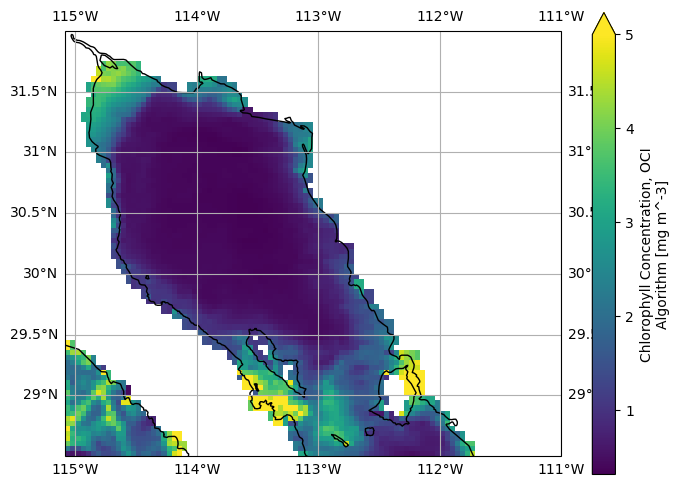

In [22]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True)

subset.plot(
    x="lon",
    y="lat",
    cmap="viridis",
    vmax=5,
    ax=ax,
    transform=ccrs.PlateCarree()
)


In [23]:
import numpy as np
# User Input: Define Transect
lat1 = 31.6
lon1 = -114.75
lat2 = 29
lon2 = -112.75

# Define transect
npts = 200  # increase/decrease for more/less detail along transect
lats = np.linspace(lat1, lat2, npts)
lons = np.linspace(lon1, lon2, npts)

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

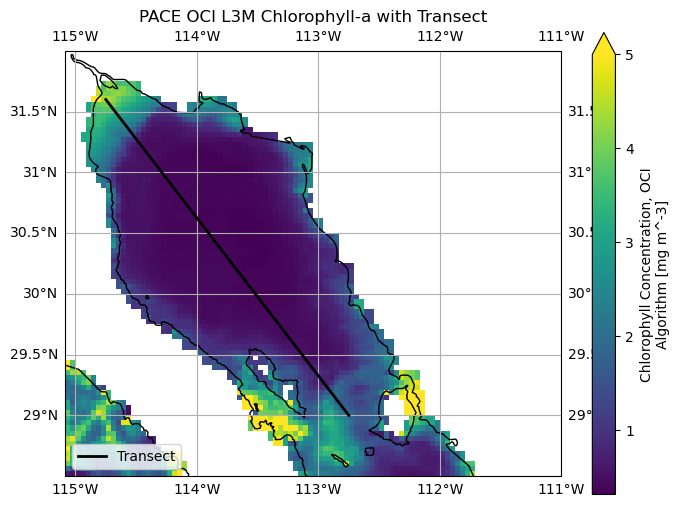

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True)
subset.plot(
    x="lon",
    y="lat",
    cmap="viridis",
    vmax=5,
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=True
)


ax.plot(
    lons,
    lats,
    color="black",
    linewidth=2,
    transform=ccrs.PlateCarree(),
    label="Transect"
)

ax.legend(loc="lower left")

plt.title("PACE OCI L3M Chlorophyll-a with Transect")
plt.show()

In [26]:
chl_transect = subset.interp(
    lat=xr.DataArray(lats, dims="points"),
    lon=xr.DataArray(lons, dims="points"),
    method="nearest"
)

In [27]:
chl_transect = chl_transect.load()

In [28]:
print(chl_transect)

<xarray.DataArray 'chlor_a' (points: 200)> Size: 800B
array([4.386904  , 4.422077  , 4.019438  , 4.019438  , 4.019438  ,
       3.596152  , 3.596152  , 3.596152  , 3.2161622 , 3.0843222 ,
       3.0843222 , 2.8227475 , 2.8227475 , 2.7351673 , 2.7351673 ,
       2.4790375 , 2.4790375 , 2.33016   , 2.107162  , 2.107162  ,
       2.107162  , 1.4983525 , 1.4983525 , 1.4983525 , 1.0582038 ,
       0.69360185, 0.69360185, 0.5713491 , 0.5713491 , 0.5713491 ,
       0.48418775, 0.48418775, 0.48418775, 0.48418775, 0.51532435,
       0.51532435, 0.51532435, 0.5019326 , 0.4851594 , 0.4851594 ,
       0.4864215 , 0.4864215 , 0.4250564 , 0.43624955, 0.43624955,
       0.43624955, 0.40302202, 0.40302202, 0.40302202, 0.40302202,
       0.40656772, 0.40656772, 0.40656772, 0.42224538, 0.40789512,
       0.40789512, 0.40082997, 0.40082997, 0.40082997, 0.4022209 ,
       0.4022209 , 0.4022209 , 0.3977651 , 0.38985428, 0.38985428,
       0.38985428, 0.39126703, 0.3914453 , 0.3914453 , 0.40849048,
       0

In [29]:
from pyproj import Geod

geod = Geod(ellps="WGS84")
dist_km = np.zeros(npts)

for i in range(1, npts):
    _, _, d = geod.inv(
        lons[i-1], lats[i-1],
        lons[i], lats[i]
    )
    dist_km[i] = dist_km[i-1] + d / 1000


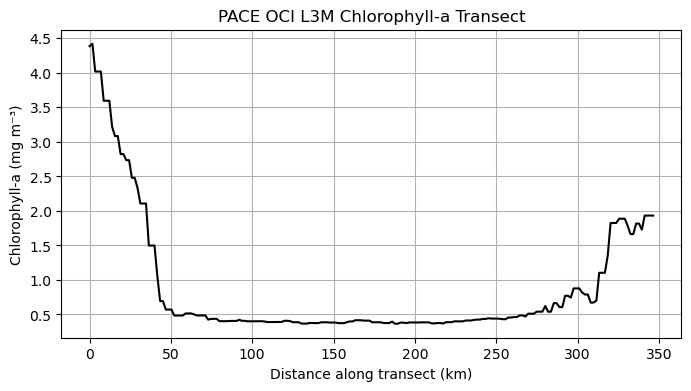

In [30]:
plt.figure(figsize=(8,4))
plt.plot(dist_km, chl_transect, "-k")
plt.xlabel("Distance along transect (km)")
plt.ylabel("Chlorophyll-a (mg m⁻³)")
plt.grid()
plt.title("PACE OCI L3M Chlorophyll-a Transect")
plt.show()


# Open and concatenate all monthly NetCDFs

In [38]:
fileset = earthaccess.open(monthly_4km)
ds = xr.open_dataset(fileset[1])

QUEUEING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/12 [00:00<?, ?it/s]

In [39]:
# We can open all the files but note there is no time coordinate so we need
# combine="nested" and concat_dim
ds = xr.open_mfdataset(
    fileset,
    combine="nested",
    concat_dim="time")
ds

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 12, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    chlor_a  (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 9kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/64)
    product_name:                      PACE_OCI.20240601_20240630.L3m.MO.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         16467765
    data_minimum:                      0.0009999998
    data_maximum:                      99.82306

In [41]:
ds.chlor_a

<xarray.DataArray 'chlor_a' (time: 12, lat: 4320, lon: 8640)> Size: 2GB
dask.array<concatenate, shape=(12, 4320, 8640), dtype=float32, chunksize=(1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

In [40]:
da = ds["chlor_a"].isel(time=0)

In [47]:
chl = ds["chlor_a"].sel(
    lat=slice(32.0, 28.5),
    lon=slice(-115.1, -111.0)
)

/tmp/ipykernel_2187/1147759389.py:13: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flat:


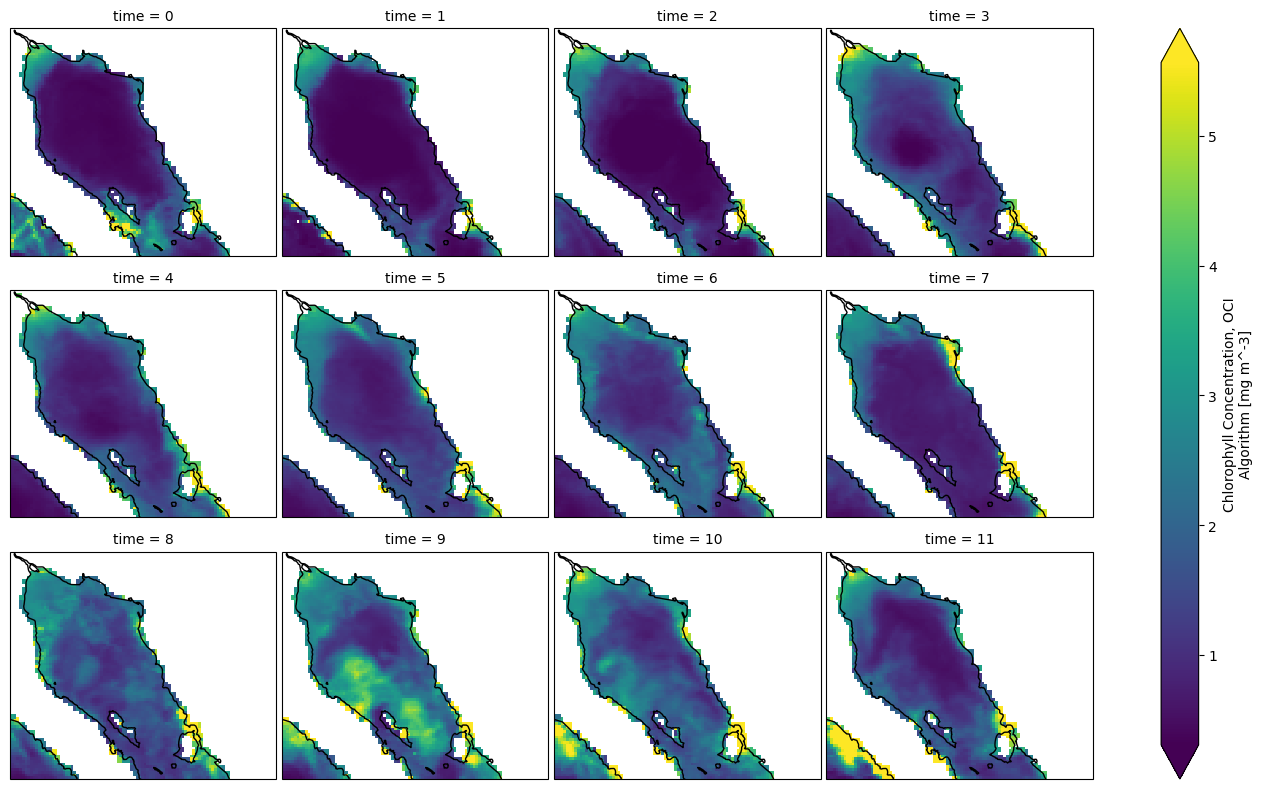

In [48]:
import cartopy.crs as ccrs

g = chl.plot(
    col="time",
    col_wrap=4,                 # 4 mapas por fila
    robust=True,
    figsize=(14, 8),
    cmap="viridis",
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree()
)

for ax in g.axes.flat:
    ax.coastlines(resolution="10m")
    ax.set_extent(
        [-115.1, -111.0, 28.5, 32.0],
        crs=ccrs.PlateCarree()
    )
